#**Libraries**


In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [3]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# **Data Load**

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **Data Preprocessing**

In [8]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
df[df['tenure'] ==0 ].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [10]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [11]:
label_encoder = LabelEncoder()

In [12]:
df['gender']=label_encoder.fit_transform(df['gender'])

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
def obj_to_int(df_series):
    if df_series.dtype == 'object':
        df_series = label_encoder.fit_transform(df_series)
    return df_series

In [15]:
df=df.drop('customerID', axis=1)

In [16]:
df=df.apply(lambda x: obj_to_int(x))

# **EDA**

In [17]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,-0.005087,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.036556,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.061571,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,-0.005469,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.155539,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.082728,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.115215,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.055138,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.044003,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.092141,-0.195290


In [18]:
churn_corr=df.corr()['Churn']

In [19]:
churn_corr

,Churn
gender,-0.008545
SeniorCitizen,0.150541
Partner,-0.149982
Dependents,-0.163128
tenure,-0.354049
PhoneService,0.011691
MultipleLines,0.038043
InternetService,-0.047097
OnlineSecurity,-0.289050
OnlineBackup,-0.195290


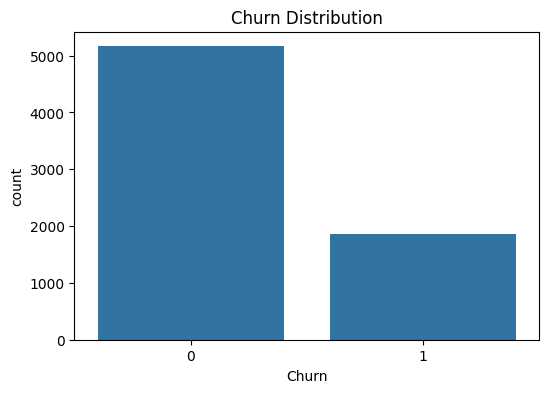

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

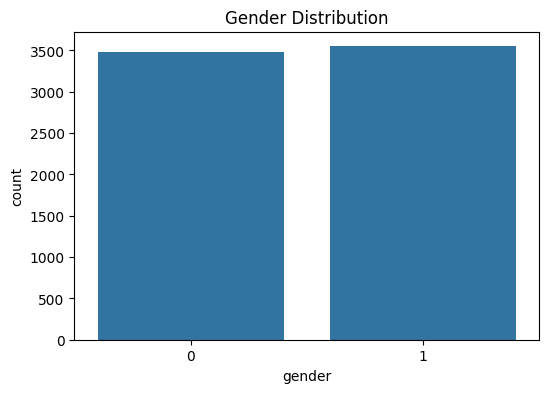

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

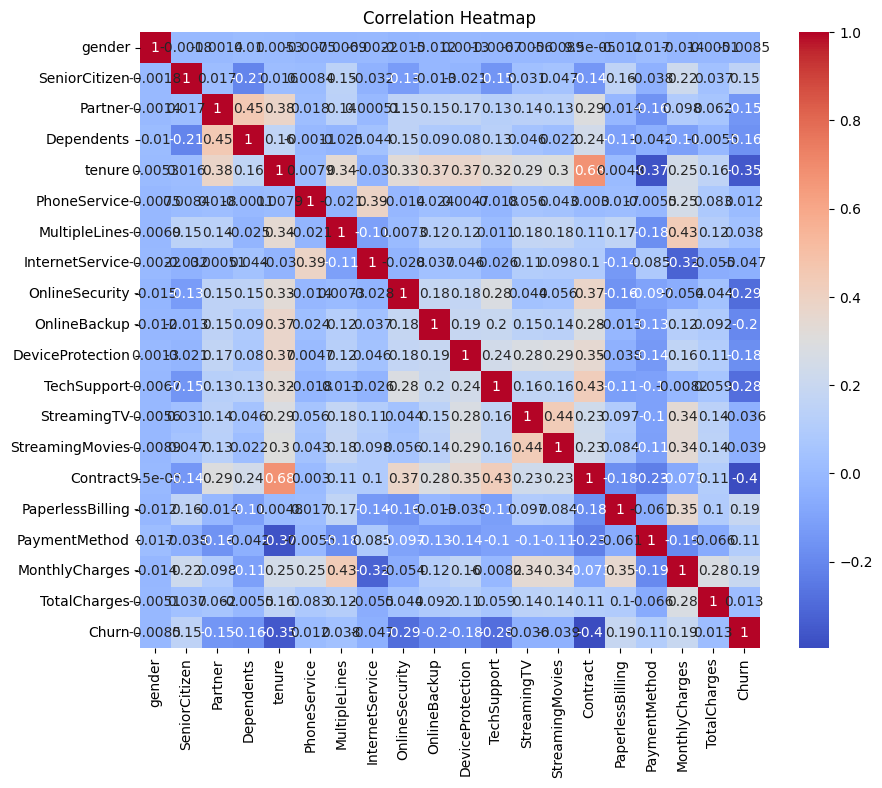

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [23]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

# **Data Split**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Random Forest**

In [25]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [86]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_classification_report = classification_report(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [27]:
rf_accuracy

0.7874911158493249

In [74]:
rf_classification_report

'              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.86      1033\n           1       0.63      0.48      0.54       374\n\n    accuracy                           0.79      1407\n   macro avg       0.73      0.69      0.70      1407\nweighted avg       0.77      0.79      0.78      1407\n'

In [87]:
rf_conf_matrix

array([[929, 104],
       [195, 179]])

# **Decision Tree**

In [28]:
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred=dt_model.predict(X_test)

In [88]:
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_classification_report = classification_report(y_test, dt_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_pred)

In [30]:
dt_accuracy

0.7348969438521677

In [75]:
dt_classification_report

'              precision    recall  f1-score   support\n\n           0       0.83      0.89      0.86      1033\n           1       0.62      0.49      0.55       374\n\n    accuracy                           0.78      1407\n   macro avg       0.72      0.69      0.70      1407\nweighted avg       0.77      0.78      0.78      1407\n'

In [89]:
dt_conf_matrix

array([[920, 113],
       [190, 184]])

# **XGBoost**

In [52]:
XGB_model=XGBClassifier(random_state=42)
XGB_model.fit(X_train, y_train)
XGB_pred=XGB_model.predict(X_test)

In [91]:
XGB_accuracy=accuracy_score(y_test, XGB_pred)
XGB_classification_report = classification_report(y_test, XGB_pred)
XGB_conf_matrix = confusion_matrix(y_test, XGB_pred)

In [92]:
XGB_accuracy

0.7718550106609808

In [77]:
XGB_classification_report

'              precision    recall  f1-score   support\n\n           0       0.82      0.88      0.85      1033\n           1       0.59      0.48      0.53       374\n\n    accuracy                           0.77      1407\n   macro avg       0.70      0.68      0.69      1407\nweighted avg       0.76      0.77      0.76      1407\n'

In [93]:
XGB_conf_matrix

array([[908, 125],
       [196, 178]])

# **SVM**

In [55]:
SVC_model=SVC(random_state=42)
SVC_model.fit(X_train, y_train)
SVC_pred=SVC_model.predict(X_test)

In [94]:
SVC_accuracy=accuracy_score(y_test, SVC_pred)
SVC_classification_report = classification_report(y_test, SVC_pred)
SVC_conf_matrix = confusion_matrix(y_test, SVC_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
SVC_accuracy

0.7846481876332623

In [79]:
SVC_classification_report

'              precision    recall  f1-score   support\n\n           0       0.73      1.00      0.85      1033\n           1       0.00      0.00      0.00       374\n\n    accuracy                           0.73      1407\n   macro avg       0.37      0.50      0.42      1407\nweighted avg       0.54      0.73      0.62      1407\n'

In [95]:
SVC_conf_matrix

array([[1033,    0],
       [ 374,    0]])

# **Gradient Boosting**

In [58]:
gb_model=GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred=gb_model.predict(X_test)

In [96]:
gb_accuracy=accuracy_score(y_test, gb_pred)
gb_classification_report = classification_report(y_test, gb_pred)
gb_conf_matrix = confusion_matrix(y_test, gb_pred)

In [97]:
gb_accuracy

0.7825159914712153

In [98]:
gb_classification_report

'              precision    recall  f1-score   support\n\n           0       0.82      0.89      0.86      1033\n           1       0.62      0.47      0.54       374\n\n    accuracy                           0.78      1407\n   macro avg       0.72      0.68      0.70      1407\nweighted avg       0.77      0.78      0.77      1407\n'

In [99]:
gb_conf_matrix

array([[924, 109],
       [197, 177]])

# **Logistic Regression**

In [64]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_classification_report = classification_report(y_test, lr_pred)
lr_conf_matrix = confusion_matrix(y_test, lr_pred)

In [66]:
lr_accuracy

0.7846481876332623

In [84]:
lr_classification_report

'              precision    recall  f1-score   support\n\n           0       0.83      0.89      0.86      1033\n           1       0.62      0.49      0.55       374\n\n    accuracy                           0.78      1407\n   macro avg       0.72      0.69      0.70      1407\nweighted avg       0.77      0.78      0.78      1407\n'

In [101]:
lr_conf_matrix

array([[920, 113],
       [190, 184]])